In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow

In [122]:
df = pd.read_csv('BreastCancerData (4).csv')

In [123]:
df.head()

,Age,BMI,BreastFeeding,Marital Status,Alcohol,Smoking,BreastCancerHistory,Age at firstPeriod,MenstrualCycle,Cancer Positive
0,48,8.543723,1,1,0,0,0,15,1,0
1,31,10.204207,1,1,0,0,0,12,1,0
2,31,13.807133,1,1,0,0,0,14,1,0
3,33,14.088867,1,1,1,0,0,12,1,0
4,49,14.494061,1,1,0,0,0,15,1,0


In [124]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2388.0,41.029313,7.694522,21.000000,35.000000,41.000000,48.000000,54.0
BMI,2388.0,24.723056,4.939623,8.543723,21.168699,24.453841,27.657793,69.5
BreastFeeding,2388.0,0.891122,0.311551,0.000000,1.000000,1.000000,1.000000,1.0
Marital Status,2388.0,1.126466,0.455754,1.000000,1.000000,1.000000,1.000000,3.0
Alcohol,2388.0,0.351340,0.477489,0.000000,0.000000,0.000000,1.000000,1.0
Smoking,2388.0,0.154941,0.361925,0.000000,0.000000,0.000000,0.000000,1.0
BreastCancerHistory,2388.0,0.029313,0.168718,0.000000,0.000000,0.000000,0.000000,1.0
Age at firstPeriod,2388.0,13.104690,1.684577,8.000000,12.000000,13.000000,14.000000,21.0
MenstrualCycle,2388.0,0.781826,0.413093,0.000000,1.000000,1.000000,1.000000,1.0
Cancer Positive,2388.0,0.404523,0.490902,0.000000,0.000000,0.000000,1.000000,1.0


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 10 columns):
Age                    2388 non-null int64
BMI                    2388 non-null float64
BreastFeeding          2388 non-null int64
Marital Status         2388 non-null int64
Alcohol                2388 non-null int64
Smoking                2388 non-null int64
BreastCancerHistory    2388 non-null int64
Age at firstPeriod     2388 non-null int64
MenstrualCycle         2388 non-null int64
Cancer Positive        2388 non-null int64
dtypes: float64(1), int64(9)
memory usage: 186.7 KB


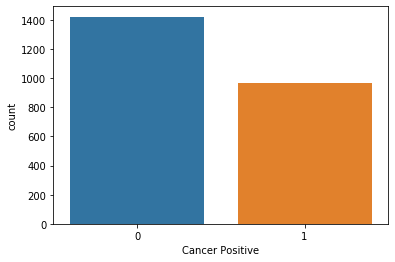

In [126]:
sns.countplot(x='Cancer Positive',data=df)

In [127]:
#correlation between Cancer Positive and other featueres
df.corr()['Cancer Positive'][:-1].sort_values()

MenstrualCycle        -0.527303
Age at firstPeriod    -0.143939
BreastFeeding         -0.125521
Alcohol                0.040402
Smoking                0.047929
BreastCancerHistory    0.145085
Marital Status         0.230007
BMI                    0.360163
Age                    0.387485
Name: Cancer Positive, dtype: float64

In [128]:
#setting data
X = df.drop('Cancer Positive',axis=1).values
y = df['Cancer Positive'].values

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scaler = MinMaxScaler()

In [133]:
X_train = scaler.fit_transform(X_train)

In [134]:
X_test = scaler.transform(X_test)

In [135]:
X_train.shape

(1791, 9)

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [137]:
model = Sequential()

model.add(Dense(9,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [138]:
model.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test))

Train on 1791 samples, validate on 597 samples
Epoch 1/500
1791/1791 [==============================] - 1s 329us/sample - loss: 0.6586 - val_loss: 0.6429
Epoch 2/500
1791/1791 [==============================] - 0s 59us/sample - loss: 0.6279 - val_loss: 0.6081
Epoch 3/500
1791/1791 [==============================] - 0s 61us/sample - loss: 0.5832 - val_loss: 0.5508
Epoch 4/500
1791/1791 [==============================] - 0s 60us/sample - loss: 0.5444 - val_loss: 0.5167
Epoch 5/500
1791/1791 [==============================] - 0s 61us/sample - loss: 0.5214 - val_loss: 0.4940
Epoch 6/500
1791/1791 [==============================] - 0s 59us/sample - loss: 0.5060 - val_loss: 0.4827
Epoch 7/500
1791/1791 [==============================] - 0s 59us/sample - loss: 0.4970 - val_loss: 0.4710
Epoch 8/500
1791/1791 [==============================] - 0s 58us/sample - loss: 0.4893 - val_loss: 0.4632
Epoch 9/500
1791/1791 [==============================] - 0s 60us/sample - loss: 0.4829 - val_loss: 0.455

1791/1791 [==============================] - 0s 61us/sample - loss: 0.3096 - val_loss: 0.3100
Epoch 78/500
1791/1791 [==============================] - 0s 58us/sample - loss: 0.3095 - val_loss: 0.2932
Epoch 79/500
1791/1791 [==============================] - 0s 55us/sample - loss: 0.3072 - val_loss: 0.2976
Epoch 80/500
1791/1791 [==============================] - 0s 53us/sample - loss: 0.3067 - val_loss: 0.3006
Epoch 81/500
1791/1791 [==============================] - 0s 52us/sample - loss: 0.3043 - val_loss: 0.2941
Epoch 82/500
1791/1791 [==============================] - 0s 52us/sample - loss: 0.3044 - val_loss: 0.2946
Epoch 83/500
1791/1791 [==============================] - 0s 53us/sample - loss: 0.3033 - val_loss: 0.2941
Epoch 84/500
1791/1791 [==============================] - 0s 55us/sample - loss: 0.3023 - val_loss: 0.2951
Epoch 85/500
1791/1791 [==============================] - 0s 52us/sample - loss: 0.3006 - val_loss: 0.2932
Epoch 86/500
1791/1791 [==========================

1791/1791 [==============================] - 0s 57us/sample - loss: 0.2547 - val_loss: 0.2473
Epoch 154/500
1791/1791 [==============================] - 0s 56us/sample - loss: 0.2550 - val_loss: 0.2593
Epoch 155/500
1791/1791 [==============================] - 0s 56us/sample - loss: 0.2529 - val_loss: 0.2568
Epoch 156/500
1791/1791 [==============================] - 0s 56us/sample - loss: 0.2546 - val_loss: 0.2681
Epoch 157/500
1791/1791 [==============================] - 0s 56us/sample - loss: 0.2522 - val_loss: 0.2432
Epoch 158/500
1791/1791 [==============================] - 0s 57us/sample - loss: 0.2518 - val_loss: 0.2432
Epoch 159/500
1791/1791 [==============================] - 0s 58us/sample - loss: 0.2508 - val_loss: 0.2473
Epoch 160/500
1791/1791 [==============================] - 0s 57us/sample - loss: 0.2508 - val_loss: 0.2431
Epoch 161/500
1791/1791 [==============================] - 0s 57us/sample - loss: 0.2503 - val_loss: 0.2448
Epoch 162/500
1791/1791 [=================

Epoch 229/500
1791/1791 [==============================] - 0s 52us/sample - loss: 0.2189 - val_loss: 0.2076
Epoch 230/500
1791/1791 [==============================] - 0s 55us/sample - loss: 0.2172 - val_loss: 0.2010
Epoch 231/500
1791/1791 [==============================] - 0s 57us/sample - loss: 0.2168 - val_loss: 0.2054
Epoch 232/500
1791/1791 [==============================] - 0s 60us/sample - loss: 0.2172 - val_loss: 0.2010
Epoch 233/500
1791/1791 [==============================] - 0s 61us/sample - loss: 0.2171 - val_loss: 0.2081
Epoch 234/500
1791/1791 [==============================] - 0s 60us/sample - loss: 0.2162 - val_loss: 0.2126
Epoch 235/500
1791/1791 [==============================] - 0s 61us/sample - loss: 0.2168 - val_loss: 0.1992
Epoch 236/500
1791/1791 [==============================] - 0s 58us/sample - loss: 0.2158 - val_loss: 0.2012
Epoch 237/500
1791/1791 [==============================] - 0s 57us/sample - loss: 0.2149 - val_loss: 0.2049
Epoch 238/500
1791/1791 [===

Epoch 305/500
1791/1791 [==============================] - 0s 46us/sample - loss: 0.1996 - val_loss: 0.1747
Epoch 306/500
1791/1791 [==============================] - 0s 47us/sample - loss: 0.1959 - val_loss: 0.1797
Epoch 307/500
1791/1791 [==============================] - 0s 43us/sample - loss: 0.1935 - val_loss: 0.1794
Epoch 308/500
1791/1791 [==============================] - 0s 45us/sample - loss: 0.1933 - val_loss: 0.1731
Epoch 309/500
1791/1791 [==============================] - 0s 42us/sample - loss: 0.1929 - val_loss: 0.1774
Epoch 310/500
1791/1791 [==============================] - 0s 45us/sample - loss: 0.1909 - val_loss: 0.1859
Epoch 311/500
1791/1791 [==============================] - 0s 42us/sample - loss: 0.1921 - val_loss: 0.1725
Epoch 312/500
1791/1791 [==============================] - 0s 44us/sample - loss: 0.1915 - val_loss: 0.1785
Epoch 313/500
1791/1791 [==============================] - 0s 43us/sample - loss: 0.1910 - val_loss: 0.1729
Epoch 314/500
1791/1791 [===

1791/1791 [==============================] - 0s 45us/sample - loss: 0.1737 - val_loss: 0.1546
Epoch 381/500
1791/1791 [==============================] - 0s 46us/sample - loss: 0.1719 - val_loss: 0.1570
Epoch 382/500
1791/1791 [==============================] - 0s 48us/sample - loss: 0.1758 - val_loss: 0.1747
Epoch 383/500
1791/1791 [==============================] - 0s 44us/sample - loss: 0.1779 - val_loss: 0.1586
Epoch 384/500
1791/1791 [==============================] - 0s 45us/sample - loss: 0.1716 - val_loss: 0.1622
Epoch 385/500
1791/1791 [==============================] - 0s 44us/sample - loss: 0.1718 - val_loss: 0.1610
Epoch 386/500
1791/1791 [==============================] - 0s 45us/sample - loss: 0.1714 - val_loss: 0.1545
Epoch 387/500
1791/1791 [==============================] - 0s 45us/sample - loss: 0.1738 - val_loss: 0.1713
Epoch 388/500
1791/1791 [==============================] - 0s 45us/sample - loss: 0.1729 - val_loss: 0.1553
Epoch 389/500
1791/1791 [=================

Epoch 456/500
1791/1791 [==============================] - 0s 47us/sample - loss: 0.1604 - val_loss: 0.1589
Epoch 457/500
1791/1791 [==============================] - 0s 45us/sample - loss: 0.1599 - val_loss: 0.1477
Epoch 458/500
1791/1791 [==============================] - 0s 46us/sample - loss: 0.1577 - val_loss: 0.1444
Epoch 459/500
1791/1791 [==============================] - 0s 48us/sample - loss: 0.1602 - val_loss: 0.1503
Epoch 460/500
1791/1791 [==============================] - 0s 48us/sample - loss: 0.1593 - val_loss: 0.1479
Epoch 461/500
1791/1791 [==============================] - 0s 48us/sample - loss: 0.1605 - val_loss: 0.1519
Epoch 462/500
1791/1791 [==============================] - 0s 46us/sample - loss: 0.1590 - val_loss: 0.1484
Epoch 463/500
1791/1791 [==============================] - 0s 61us/sample - loss: 0.1580 - val_loss: 0.1423
Epoch 464/500
1791/1791 [==============================] - 0s 60us/sample - loss: 0.1568 - val_loss: 0.1410
Epoch 465/500
1791/1791 [===

In [139]:
losses = pd.DataFrame(model.history.history)

In [140]:
losses

,loss,val_loss
0,0.658630,0.642899
1,0.627890,0.608078
2,0.583231,0.550773
3,0.544363,0.516709
4,0.521358,0.493968
...,...,...
495,0.154336,0.141871
496,0.153814,0.142649
497,0.155791,0.144463
498,0.153438,0.144995


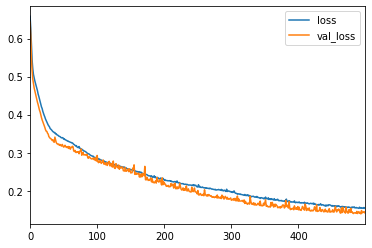

In [141]:
losses.plot()

In [142]:
model = Sequential()

model.add(Dense(9,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [143]:
from tensorflow.keras.callbacks import EarlyStopping

In [144]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [145]:
model.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 1791 samples, validate on 597 samples
Epoch 1/500
1791/1791 [==============================] - 1s 296us/sample - loss: 0.7730 - val_loss: 0.7273
Epoch 2/500
1791/1791 [==============================] - 0s 56us/sample - loss: 0.6925 - val_loss: 0.6683
Epoch 3/500
1791/1791 [==============================] - 0s 61us/sample - loss: 0.6494 - val_loss: 0.6389
Epoch 4/500
1791/1791 [==============================] - 0s 56us/sample - loss: 0.6173 - val_loss: 0.6023
Epoch 5/500
1791/1791 [==============================] - 0s 55us/sample - loss: 0.5795 - val_loss: 0.5580
Epoch 6/500
1791/1791 [==============================] - 0s 58us/sample - loss: 0.5353 - val_loss: 0.5047
Epoch 7/500
1791/1791 [==============================] - 0s 56us/sample - loss: 0.5029 - val_loss: 0.4800
Epoch 8/500
1791/1791 [==============================] - 0s 59us/sample - loss: 0.4859 - val_loss: 0.4639
Epoch 9/500
1791/1791 [==============================] - 0s 58us/sample - loss: 0.4758 - val_loss: 0.450

1791/1791 [==============================] - 0s 53us/sample - loss: 0.2324 - val_loss: 0.2236
Epoch 78/500
1791/1791 [==============================] - 0s 55us/sample - loss: 0.2326 - val_loss: 0.2229
Epoch 79/500
1791/1791 [==============================] - 0s 56us/sample - loss: 0.2324 - val_loss: 0.2197
Epoch 80/500
1791/1791 [==============================] - 0s 56us/sample - loss: 0.2302 - val_loss: 0.2211
Epoch 81/500
1791/1791 [==============================] - 0s 59us/sample - loss: 0.2286 - val_loss: 0.2208
Epoch 82/500
1791/1791 [==============================] - 0s 57us/sample - loss: 0.2288 - val_loss: 0.2264
Epoch 83/500
1791/1791 [==============================] - 0s 55us/sample - loss: 0.2296 - val_loss: 0.2337
Epoch 84/500
1791/1791 [==============================] - 0s 54us/sample - loss: 0.2274 - val_loss: 0.2211
Epoch 85/500
1791/1791 [==============================] - 0s 52us/sample - loss: 0.2279 - val_loss: 0.2234
Epoch 86/500
1791/1791 [==========================

1791/1791 [==============================] - 0s 53us/sample - loss: 0.2030 - val_loss: 0.1909
Epoch 154/500
1791/1791 [==============================] - 0s 53us/sample - loss: 0.2024 - val_loss: 0.1957
Epoch 155/500
1791/1791 [==============================] - 0s 52us/sample - loss: 0.2033 - val_loss: 0.1977
Epoch 156/500
1791/1791 [==============================] - 0s 53us/sample - loss: 0.2025 - val_loss: 0.1960
Epoch 157/500
1791/1791 [==============================] - 0s 54us/sample - loss: 0.2034 - val_loss: 0.1920
Epoch 158/500
1791/1791 [==============================] - 0s 54us/sample - loss: 0.2023 - val_loss: 0.1969
Epoch 159/500
1791/1791 [==============================] - 0s 52us/sample - loss: 0.2032 - val_loss: 0.1881
Epoch 160/500
1791/1791 [==============================] - 0s 52us/sample - loss: 0.2044 - val_loss: 0.1912
Epoch 161/500
1791/1791 [==============================] - 0s 55us/sample - loss: 0.2016 - val_loss: 0.1888
Epoch 162/500
1791/1791 [=================

Epoch 229/500
1791/1791 [==============================] - 0s 59us/sample - loss: 0.1916 - val_loss: 0.1804
Epoch 230/500
1791/1791 [==============================] - 0s 58us/sample - loss: 0.1915 - val_loss: 0.1955
Epoch 231/500
1791/1791 [==============================] - 0s 58us/sample - loss: 0.1949 - val_loss: 0.1892
Epoch 232/500
1791/1791 [==============================] - 0s 58us/sample - loss: 0.1928 - val_loss: 0.1812
Epoch 233/500
1791/1791 [==============================] - 0s 58us/sample - loss: 0.1925 - val_loss: 0.1787
Epoch 234/500
1791/1791 [==============================] - 0s 58us/sample - loss: 0.1926 - val_loss: 0.1845
Epoch 235/500
1791/1791 [==============================] - 0s 57us/sample - loss: 0.1909 - val_loss: 0.1877
Epoch 236/500
1791/1791 [==============================] - 0s 57us/sample - loss: 0.1917 - val_loss: 0.1837
Epoch 237/500
1791/1791 [==============================] - 0s 58us/sample - loss: 0.1929 - val_loss: 0.1780
Epoch 238/500
1791/1791 [===

Epoch 305/500
1791/1791 [==============================] - 0s 62us/sample - loss: 0.1843 - val_loss: 0.1815
Epoch 306/500
1791/1791 [==============================] - 0s 61us/sample - loss: 0.1827 - val_loss: 0.1770
Epoch 307/500
1791/1791 [==============================] - 0s 58us/sample - loss: 0.1823 - val_loss: 0.1762
Epoch 308/500
1791/1791 [==============================] - 0s 58us/sample - loss: 0.1844 - val_loss: 0.1806
Epoch 309/500
1791/1791 [==============================] - 0s 57us/sample - loss: 0.1818 - val_loss: 0.1819
Epoch 310/500
1791/1791 [==============================] - 0s 56us/sample - loss: 0.1832 - val_loss: 0.1754
Epoch 311/500
1791/1791 [==============================] - 0s 56us/sample - loss: 0.1830 - val_loss: 0.1783
Epoch 312/500
1791/1791 [==============================] - 0s 57us/sample - loss: 0.1826 - val_loss: 0.1711
Epoch 313/500
1791/1791 [==============================] - 0s 58us/sample - loss: 0.1821 - val_loss: 0.1744
Epoch 314/500
1791/1791 [===

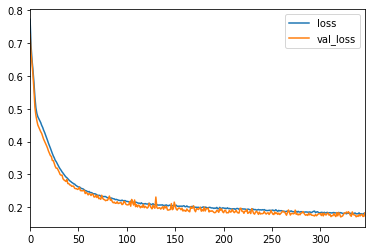

In [146]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [147]:
predictions = model.predict_classes(X_test)

In [148]:
predictions

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [149]:
from sklearn.metrics import classification_report,confusion_matrix

In [150]:
print(confusion_matrix(y_test,predictions))

[[344   5]
 [ 40 208]]


In [151]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       349
           1       0.98      0.84      0.90       248

    accuracy                           0.92       597
   macro avg       0.94      0.91      0.92       597
weighted avg       0.93      0.92      0.92       597



In [152]:
probablility = model.predict_proba(X_test)

In [153]:
probablility[0][0]*100

37.42268085479736

In [154]:
new_data = df.drop('Cancer Positive',axis=1).iloc[0]

In [155]:
new_data

Age                    48.000000
BMI                     8.543723
BreastFeeding           1.000000
Marital Status          1.000000
Alcohol                 0.000000
Smoking                 0.000000
BreastCancerHistory     0.000000
Age at firstPeriod     15.000000
MenstrualCycle          1.000000
Name: 0, dtype: float64

In [156]:
new_data = scaler.transform(new_data.values.reshape(-1,9))

In [105]:
new_data

array([[ 0.8125    , -0.02800342,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.53846154,  1.        ]])

In [106]:
model.predict(new_data)

array([[0.06771681]], dtype=float32)

In [107]:
model.predict_classes(new_data)

array([[0]])

In [108]:
model.predict_proba(new_data)

array([[0.06771681]], dtype=float32)

In [109]:
df.head()

,Age,BMI,BreastFeeding,Marital Status,Alcohol,Smoking,BreastCancerHistory,Age at firstPeriod,MenstrualCycle,Cancer Positive
0,48,8.543723,1,1,0,0,0,15,1,0
1,31,10.204207,1,1,0,0,0,12,1,0
2,31,13.807133,1,1,0,0,0,14,1,0
3,33,14.088867,1,1,1,0,0,12,1,0
4,49,14.494061,1,1,0,0,0,15,1,0


In [113]:
from tensorflow.keras.models import load_model

In [115]:
model.save('final_ANN_model.h5')

In [116]:
later_model = load_model('final_ANN_model.h5')

In [117]:
later_model.predict(new_data)

array([[0.06771681]], dtype=float32)